Explore the data visualization techniques on seaborn dataset

In [45]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from matplotlib.colors import LinearSegmentedColormap
import plotly.express as px
import plotly.graph_objects as go

In [46]:
# Upload dataset
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload your file

Saving tips-expt4 - tips-expt4.csv to tips-expt4 - tips-expt4 (2).csv


In [47]:
# Read the dataset (assuming it's a CSV file)
# If your file has a different format, adjust the reading method accordingly
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

In [48]:
# Display the first few rows
print("Dataset Preview:")
display(df.head())

Dataset Preview:


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [49]:
# Basic information about the dataset
print("\nDataset Information:")
display(df.info())

print("\nStatistical Summary:")
display(df.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


None


Statistical Summary:


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [50]:
# Check for missing values
print("\nMissing Values:")
display(df.isnull().sum())


Missing Values:


,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


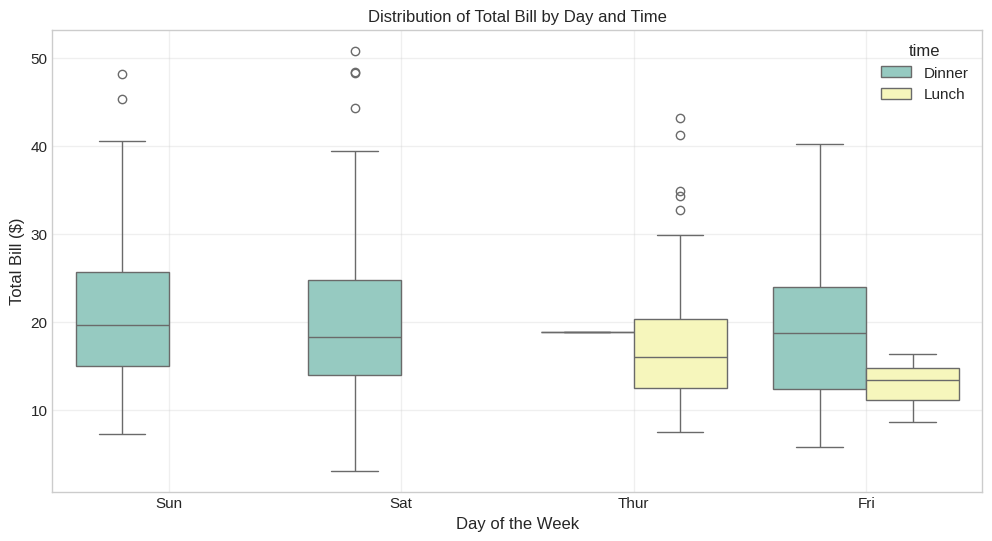

In [51]:
# 1. Box Plot: Distribution of total bill by day and time
plt.figure(figsize=(12, 6))
sns.boxplot(x='day', y='total_bill', hue='time', data=df, palette='Set3')
plt.title('Distribution of Total Bill by Day and Time')
plt.ylabel('Total Bill ($)')
plt.xlabel('Day of the Week')
plt.grid(True, alpha=0.3)
plt.show()

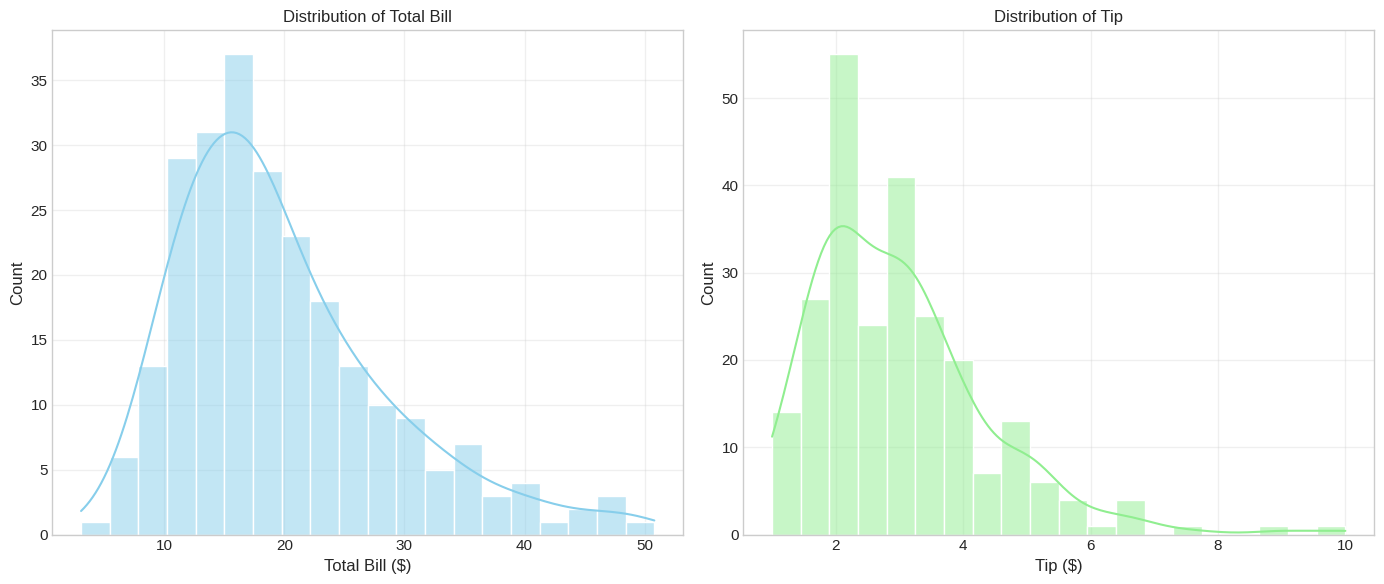

In [52]:
# 2. Histograms: Distribution of total bill and tip
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Total bill histogram
sns.histplot(df['total_bill'], kde=True, bins=20, ax=ax1, color='skyblue')
ax1.set_title('Distribution of Total Bill')
ax1.set_xlabel('Total Bill ($)')
ax1.grid(True, alpha=0.3)

# Tip histogram
sns.histplot(df['tip'], kde=True, bins=20, ax=ax2, color='lightgreen')
ax2.set_title('Distribution of Tip')
ax2.set_xlabel('Tip ($)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

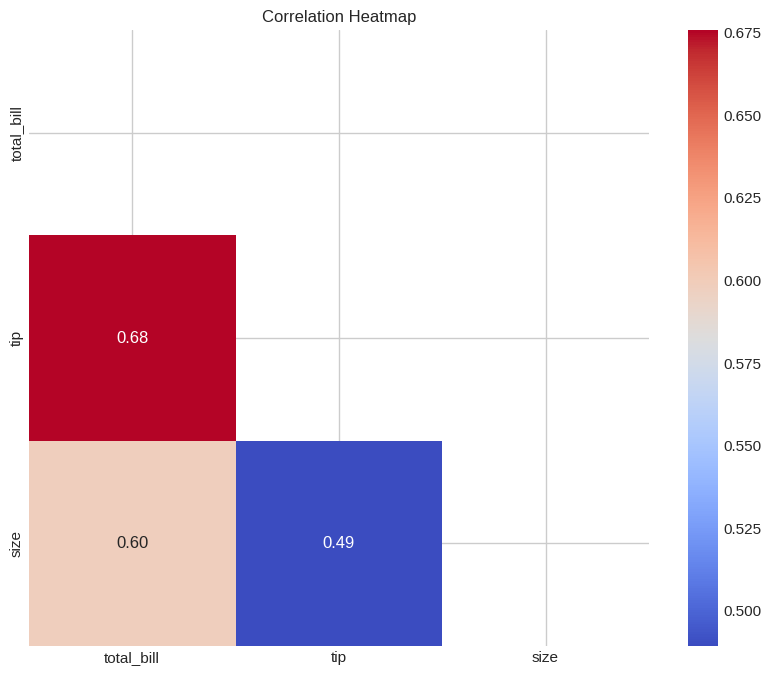

In [53]:
# 3. Heat Map: Correlation between numerical variables
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-54-2702ec6ca190>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-54-2702ec6ca190>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-54-2702ec6ca190>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-54-2702ec6ca190>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




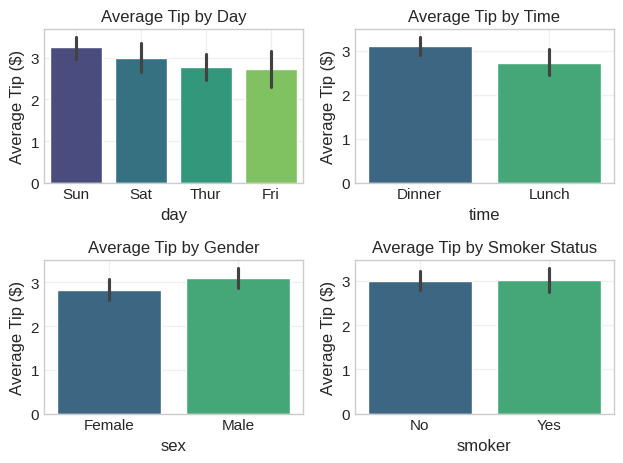

In [54]:
plt.subplot(2, 2, 1)
sns.barplot(x='day', y='tip', data=df, palette='viridis')
plt.title('Average Tip by Day')
plt.ylabel('Average Tip ($)')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
sns.barplot(x='time', y='tip', data=df, palette='viridis')
plt.title('Average Tip by Time')
plt.ylabel('Average Tip ($)')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
sns.barplot(x='sex', y='tip', data=df, palette='viridis')
plt.title('Average Tip by Gender')
plt.ylabel('Average Tip ($)')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
sns.barplot(x='smoker', y='tip', data=df, palette='viridis')
plt.title('Average Tip by Smoker Status')
plt.ylabel('Average Tip ($)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# # 4.2 Scatter Plot: Relationship between total bill and tip
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='total_bill', y='tip', hue='time', size='size', data=df, palette='dark', sizes=(20, 200))
# plt.title('Relationship Between Total Bill and Tip')
# plt.xlabel('Total Bill ($)')
# plt.ylabel('Tip ($)')
# plt.grid(True, alpha=0.3)
# plt.show()

# # 4.3 Line Chart: Average total bill by day and size
# average_bill_by_day_size = df.groupby(['day', 'size'])['total_bill'].mean().reset_index()
# pivot_table = average_bill_by_day_size.pivot(index='day', columns='size', values='total_bill')

# plt.figure(figsize=(12, 6))
# sns.lineplot(data=pivot_table)
# plt.title('Average Total Bill by Day and Party Size')
# plt.xlabel('Day of Week')
# plt.ylabel('Average Total Bill ($)')
# plt.grid(True, alpha=0.3)
# plt.legend(title='Party Size')
# plt.show()

In [55]:
# # 5. Tree Map: Total bills by day and time
# # We'll use Plotly for this
# day_time_bill = df.groupby(['day', 'time'])['total_bill'].sum().reset_index()
# day_time_bill['labels'] = day_time_bill['day'] + '-' + day_time_bill['time']

# fig = px.treemap(day_time_bill,
#                 path=['day', 'time'],
#                 values='total_bill',
#                 color='total_bill',
#                 color_continuous_scale='RdBu',
#                 title='Total Bill Amount by Day and Time (Tree Map)')
# fig.show()

In [56]:
# # 6. Word Cloud for categorical data (simulating frequency-based representation)
# plt.figure(figsize=(12, 6))

# # Count frequency of day, time, sex, smoker
# day_counts = df['day'].value_counts()
# time_counts = df['time'].value_counts()
# sex_counts = df['sex'].value_counts()
# smoker_counts = df['smoker'].value_counts()

# # Combine all categories with their counts
# text_data = {}
# for day, count in day_counts.items():
#     text_data[day] = count * 10  # Multiply to increase prominence

# for time, count in time_counts.items():
#     text_data[time] = count * 10

# for sex, count in sex_counts.items():
#     text_data[sex] = count * 10

# for smoker, count in smoker_counts.items():
#     text_data[smoker] = count * 10

# # Create and generate a word cloud image
# colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]
# cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=10)

# wordcloud = WordCloud(width=800, height=400,
#                       background_color='white',
#                       colormap=cmap,
#                       max_words=50).generate_from_frequencies(text_data)

# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud of Categorical Variables')
# plt.show()

<Figure size 1200x800 with 0 Axes>

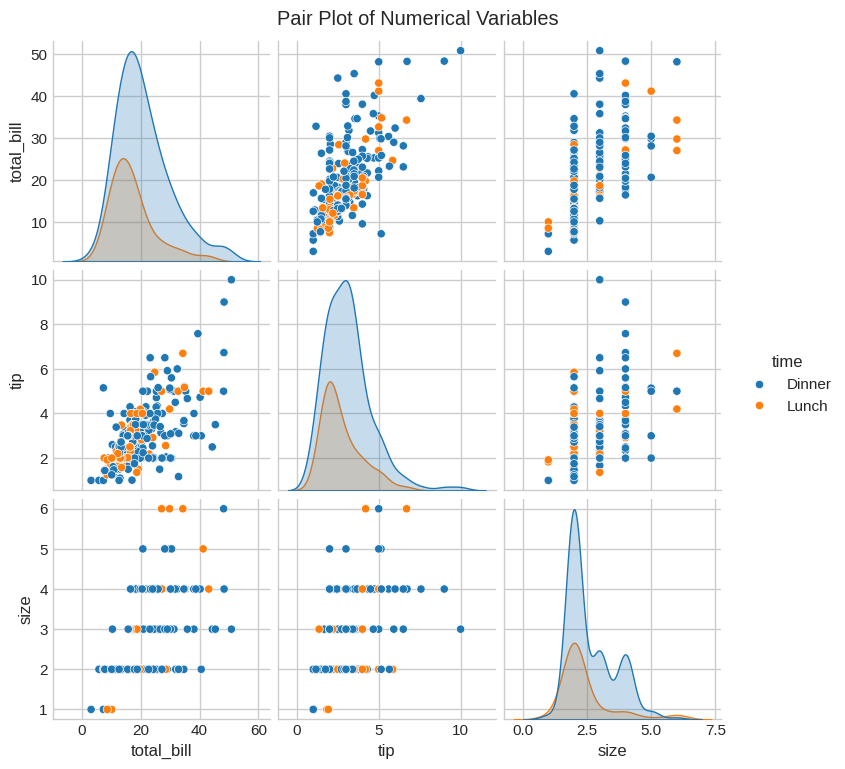

In [57]:
# 7. Pair Plot: Relationships between numerical variables
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='time', palette='tab10')
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

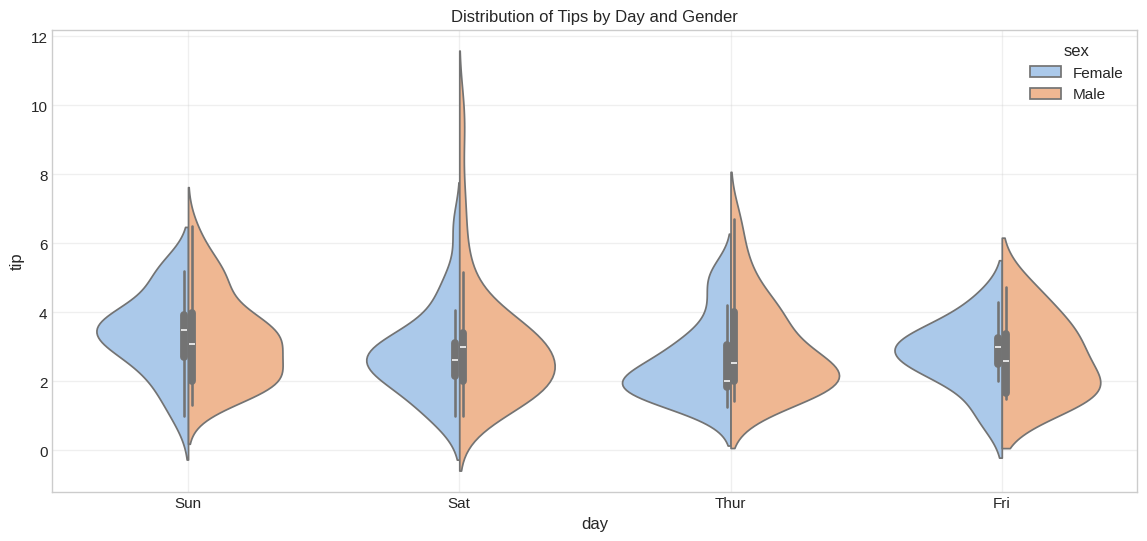

In [58]:
# 8. Violin Plot: Distribution of tips by different factors
plt.figure(figsize=(14, 6))
sns.violinplot(x='day', y='tip', hue='sex', data=df, palette='pastel', split=True)
plt.title('Distribution of Tips by Day and Gender')
plt.grid(True, alpha=0.3)
plt.show()

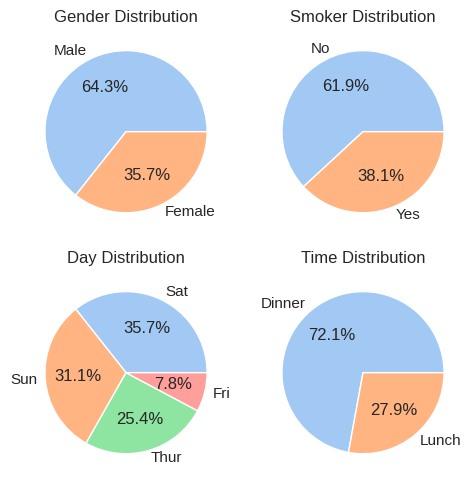

In [59]:
# 9. Pie Chart: Proportion of customers by different categories
fig, axes = plt.subplots(2, 2, figsize=(5, 5))

# Gender distribution
gender_counts = df['sex'].value_counts()
axes[0, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
axes[0, 0].set_title('Gender Distribution')

# Smoker distribution
smoker_counts = df['smoker'].value_counts()
axes[0, 1].pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
axes[0, 1].set_title('Smoker Distribution')

# Day distribution
day_counts = df['day'].value_counts()
axes[1, 0].pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
axes[1, 0].set_title('Day Distribution')

# Time distribution
time_counts = df['time'].value_counts()
axes[1, 1].pie(time_counts, labels=time_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
axes[1, 1].set_title('Time Distribution')

plt.tight_layout()
plt.show()

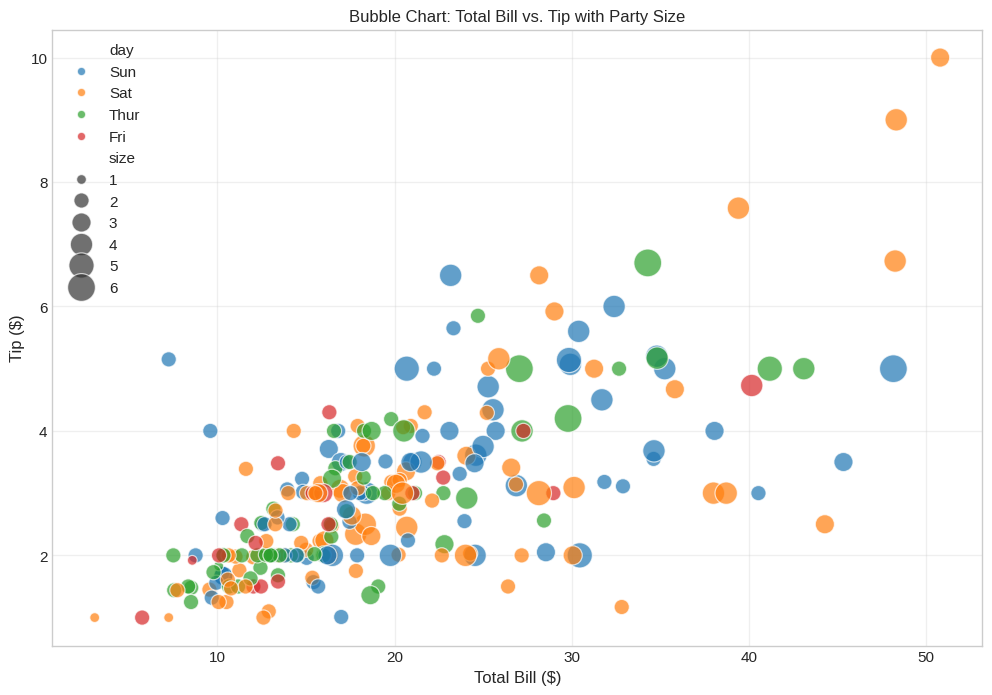

In [60]:
# 10. Bubble Chart: Total bill, tip, and party size
plt.figure(figsize=(12, 8))
sns.scatterplot(x='total_bill',
                y='tip',
                size='size',
                hue='day',
                sizes=(50, 400),
                alpha=0.7,
                palette='tab10',
                data=df)
plt.title('Bubble Chart: Total Bill vs. Tip with Party Size')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.grid(True, alpha=0.3)
plt.show()

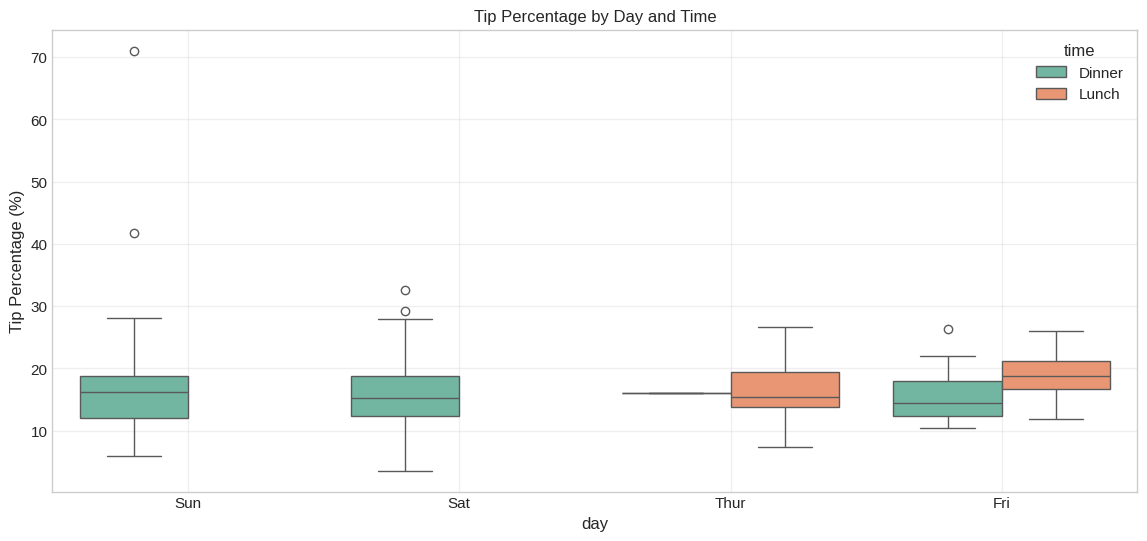

In [61]:
# 11. Tip Percentage Analysis
# Create a new column for tip percentage
df['tip_percentage'] = (df['tip'] / df['total_bill']) * 100

# Visualize tip percentage by different factors
plt.figure(figsize=(14, 6))
sns.boxplot(x='day', y='tip_percentage', hue='time', data=df, palette='Set2')
plt.title('Tip Percentage by Day and Time')
plt.ylabel('Tip Percentage (%)')
plt.grid(True, alpha=0.3)
plt.show()

In [62]:
# # 12. Network Diagram-like visualization for party size relationships
# # We'll create a chord diagram using Plotly
# size_day = df.groupby(['size', 'day']).size().reset_index(name='count')

# fig = go.Figure(data=[go.Sankey(
#     node = dict(
#       pad = 15,
#       thickness = 20,
#       line = dict(color = "black", width = 0.5),
#       label = list(set(size_day['size'].astype(str).tolist() + size_day['day'].tolist())),
#       color = "blue"
#     ),
#     link = dict(
#       source = [list(set(size_day['size'].astype(str).tolist() + size_day['day'].tolist())).index(str(s)) for s in size_day['size']],
#       target = [list(set(size_day['size'].astype(str).tolist() + size_day['day'].tolist())).index(d) for d in size_day['day']],
#       value = size_day['count']
#     ))])

# fig.update_layout(title_text="Network Diagram: Relationship between Party Size and Day", font_size=10)
# fig.show()

<ipython-input-63-744526d5b311>:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



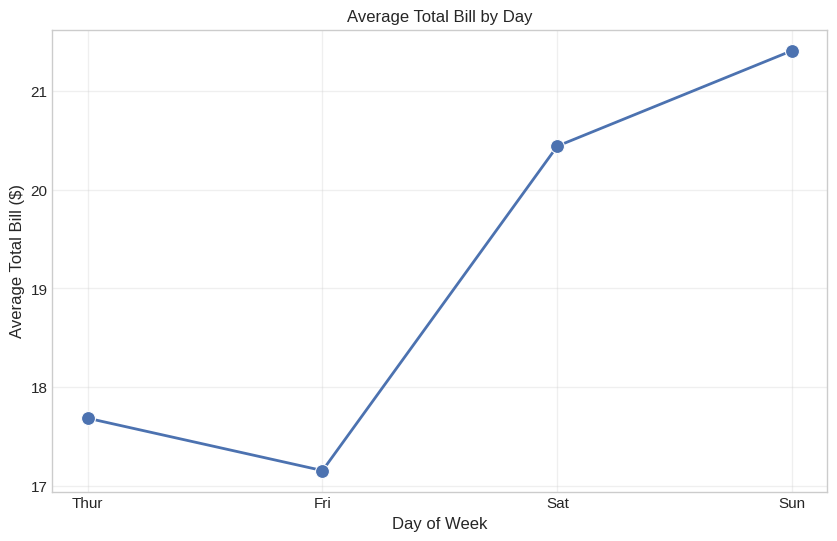

In [63]:
# 13. Time Series-like Analysis: Average bill by time/day
day_order = ['Thur', 'Fri', 'Sat', 'Sun']
df['day'] = pd.Categorical(df['day'], categories=day_order, ordered=True)

avg_bill_by_day = df.groupby('day')['total_bill'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='day', y='total_bill', data=avg_bill_by_day, marker='o', markersize=10, linewidth=2)
plt.title('Average Total Bill by Day')
plt.xlabel('Day of Week')
plt.ylabel('Average Total Bill ($)')
plt.grid(True, alpha=0.3)
plt.show()

In [66]:
# # 14. Joint Plot: Relationship between total bill and tip with distributions
# plt.figure(figsize=(10, 8))
# joint_plot = sns.jointplot(x='total_bill', y='tip', data=df, kind='reg',
#                           scatter_kws={'alpha': 0.5},
#                           joint_kws={'scatter_kws': {'alpha': 0.5}})
# joint_plot.fig.suptitle('Joint Distribution of Total Bill and Tip', y=1.02, fontsize=16)
# plt.show()

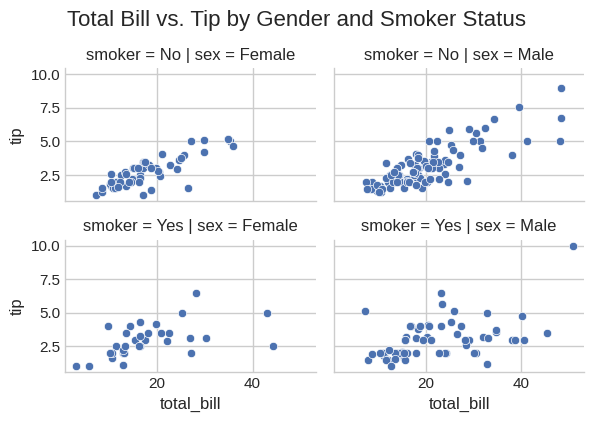

In [65]:
# 15. Facet Grid: Multiple visualizations by gender and smoker status
g = sns.FacetGrid(df, col='sex', row='smoker', height=2, aspect=1.5)
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip')
g.add_legend()
g.fig.suptitle('Total Bill vs. Tip by Gender and Smoker Status', y=1.05, fontsize=16)
plt.show()